In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

data = pd.read_csv("/kaggle/input/titanic/train.csv")

data.columns

In [ ]:
data.info()

In [ ]:
data.dtypes

In [ ]:
data.describe()

# Percentage of missing values

In [ ]:
data.isnull().sum()

In [ ]:
get = data.isnull().sum()

get[get>0]/len(data)*100

### by using plotly

In [ ]:
import plotly.express as px
name = ["Age","Cabin","Embarked"]
value = [19.865320,77.104377,0.224467]
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(values=value, names=name,title='Percentage of missing values')
fig.show()

# Dropping the irrelevant columns

In [ ]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
data.head(1)

# Filling of Missing values

In [ ]:
#Visualizing the missing values
sns.heatmap(data.isnull())

In [ ]:
import plotly.express as px

fig = px.imshow(data.isnull())
fig.show()

In [ ]:
# Filling Missing values to "Age" Feature by using mode
data["Age"] = data["Age"].fillna(data["Age"].mode()[0])

In [ ]:
# Filling Missing values to "Embarked" Feature by using mode
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [ ]:
# print missing value of "Age" & "Embarked" Feature
print(data["Age"].isnull().sum(),data["Embarked"].isnull().sum())

In [ ]:
# visualize "Age" and "Embarked" feature by using Heatmap to see missing values
lets_see = data[["Age","Embarked"]]
sns.heatmap(lets_see.isnull())

In the lines of code above, we checked the **data type, missing values, and drop some irrelevant columns, and filled missing values with the most frequent(mode) values of the columns(Age, Embarked).**

# Outliers Identification

There are different ways and methods of identifying outliers, but we are only going to use some of the most popular techniques:

- Visualization
- Skewness
- Interquartile Range
- Standard Deviation

# 1. Visualization
Outliers can be detected using different visualization methods, we are going to use :

- Boxplot
- Histogram

# Boxplot
boxplot is a visualization tool for identifying outliers, it displays the distribution of statistical observations, its body is classified into four parts; the lowest and the highest(minimum and maximum), the 25 percentile(first quartile(Q1)), the median(50th percentile), the 75th percentile(third quartile(Q3)).m

outliers appears above or below the minimum and maximum of the boxplot.

![BoxPlotPreview](https://miro.medium.com/v2/resize:fit:636/format:webp/1*n_2_Icep644OkokWg0UIxQ.png)

the line of code below plots the boxplot of the ‘Fare’ variable.

In [ ]:
sns.boxplot(data["Fare"])

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.box(data, y="Fare")
fig.show()

from the boxplot above, the black circular points which are indicated by an arrow show the presence of extreme values in the variable.

# Histogram
To visualize the distribution of a numerical variable, a histogram shows the direction in which these variables are distributed, outliers will appear outside the overall distribution of the data. if the histogram is right-skewed or left-skewed, it indicates the presence of extreme values or outliers.

![histo](https://miro.medium.com/v2/resize:fit:518/format:webp/1*F3Nb8vhhxP2VdUy8ehDWaw.png)

the code below plots the histogram of the ‘Fare’ variable.

In [ ]:
data['Fare'].hist()

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="Fare")
fig.show()

from the histogram above, the histogram appears to be distributed to the left, this also indicates the presence of outliers.

# 2. Skewness

the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

the code below prints the skewness value of the ‘Fare’ variable.

In [ ]:
print('skewness value of Age: ',data['Age'].skew())
print('skewness value of Fare: ',data['Fare'].skew())

In [ ]:
positive  = pd.Series([1.0,2.0,3.0,4.0,100.0])
print('skewness positive: ',positive.skew())

negative  = pd.Series([-10.0,-9.0,-8.0,-7.0,-1.0])
print('skewness Negative : ',negative.skew())

In [ ]:
plt.hist([1.0,2.0,3.0,4.0,100.0])
# Add a title
plt.title("Positive Sewness")

In [ ]:
plt.hist([-10.0,-9.0,-8.0,-7.0,-1.0])
# Add a title
plt.title("Negative Sewness")

In [ ]:
plt.hist(data["Age"])
# Add a title
plt.title("symetric Sewness")

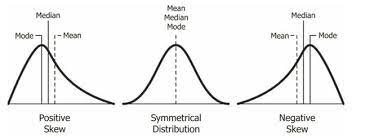

the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value indicates the presence of extreme value or outlier.

from the code above, the ‘Fare’ skewness value of 4.78 shows the variable has been rightly skewed, indicating the presence of outliers.

# 3. Interquartile Range(IQR)

The interquartile range is a measure of statistical dispersion and is calculated as the difference between 75th and 25th percentiles. the Quartiles divide the data set into four equal parts. The values that separate parts are called the first, second, and third quartiles.

![IQR](https://miro.medium.com/v2/resize:fit:640/format:webp/0*VwJg7xtr-H2Iox5r.jpg)

this code shows the interquartile range value of the ‘Fare’ variable.

In [ ]:
Q1=data['Fare'].quantile(0.25)
Q3=data['Fare'].quantile(0.75)
IQR=Q3-Q1
IQR

the code below prints the outliers and sets the 25th and 75th percentile of the ‘Fare’ variable respectively which will also be used in flooring and capping in the outliers treatment process.

In [ ]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = data[(data['Fare'] < Q1 - whisker_width*IQR) | (data['Fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

# 4. Standard Deviation
Standard deviation measures the amount of variation and dispersion of a set of values relative to the average value of the data, it shows the variability distribution of the data.

A high standard deviation indicates that the values are highly dispersed while a low standard deviation indicates that the variation or dispersion of the values is low.

![std](https://miro.medium.com/v2/resize:fit:636/format:webp/1*V7QMkcunIei1vODXRDCr1A.png)

the code below prints the outliers

In [ ]:
fare_mean = data['Fare'].mean()
fare_std = data['Fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = data[(data['Fare'] < low) | (data['Fare'] > high)]
fare_outliers.head()

# Outliers Treatment

- Flooring and Capping.
- Trimming.
- Replacing outliers with the mean, median, mode, or other values.

# Flooring And Capping
in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ variable.

In [ ]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Fare']=np.where(data['Fare']>upper_whisker,upper_whisker,np.where(data['Fare']<lower_whisker,lower_whisker,data['Fare']))

# Replace outliers by mode

In [ ]:
# mode = df['Fare'].mode()

# Replace any values in the Fare column that are greater than the upper whisker with the mode
# df['Fare'] = np.where(df['Fare'] > upper_whisker, mode, df['Fare'])

# Replace any values in the Fare column that are less than the lower whisker with the mode
# df['Fare'] = np.where(df['Fare'] < lower_whisker, mode, df['Fare'])

we can now use the boxplot or other outliers identification method to check if there is still the presence of outliers.

the boxplot below shows no presence of outliers.

In [ ]:
sns.boxplot(data['Fare'])

we now compare the two boxplots with the one before and after the treatment of the outliers.

# Trimming

in this method, we removed and completely drop all the outliers, the line of code below creates an index for all data points and drop the index values.

In [ ]:
Q1 = data['Fare'].quantile(0.10)
Q3 = data['Fare'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=data['Fare'][(data['Fare']>upper_whisker)|(data['Fare']<lower_whisker)].index
data.drop(index,inplace=True)

In [ ]:
sns.boxplot(data['Fare'])

In [ ]:
# Create a box plot of the Age column
sns.boxplot(data["Age"], color="orange")

# Add a title
plt.title("Age Distribution")

#Replacing Outliers With The Mean, Median, Mode, or other Values

in this technique, we replace the extreme values with the mode value, you can use median or mean value but it is advised not to use the mean values because it is highly susceptible to outliers.

# More About Skewed Distributions

Here are the differences between mean, median, and mode for right, left, and symmetric skew distributions in simple text form:

# Mean
The mean is the average of all the data points in a distribution.

In a **right-skewed distribution**, the mean is greater than the median and the mode. This is because there are a few data points that are much larger than the rest of the data. These few data points pull the mean towards the right side of the distribution.

In a **left-skewed distribution**, the mean is less than the median and the mode. This is because there are a few data points that are much smaller than the rest of the data. These few data points pull the mean towards the left side of the distribution.

In a **symmetric distribution**, the mean is equal to the median and the mode. This is because the data points are evenly distributed on either side of the middle value.

# Median
The median is the middle value of a distribution when the data points are arranged in increasing order.

In a **right-skewed distribution**, the median is equal to the mean. This is because the mean is pulled towards the right side of the distribution by the few large data points. So, the median is also pulled towards the right side of the distribution.

In a **left-skewed distribution**, the median is also equal to the mean. This is because the mean is pulled towards the left side of the distribution by the few small data points. So, the median is also pulled towards the left side of the distribution.

In a **symmetric distribution**, the median is equal to the mean and the mode because the data points are evenly distributed on either side of the middle value. So, the median is also equal to the middle value.

# Mode
The mode is the most frequent data point in a distribution.

In a **right-skewed distribution***, the mode is less than the median. This is because the few large data points pull the distribution towards the right. So, the most frequent data point is also pulled towards the right.

In a **left-skewed distribution**, the mode is greater than the median. This is because the few small data points pull the distribution towards the left. So, the most frequent data point is also pulled towards the left.

In a **symmetric distribution**, the mode is equal to the median and the mean because the data points are evenly distributed on either side of the middle value. So, the most frequent data point is also equal to the middle value.

In [ ]:
nan